In [2]:
import numpy as np
import matplotlib.image as img
import os
import random
from matplotlib import pyplot as plt

images = {}
for filename in os.listdir('StarterFiles/Train1'): # should be Train1
    images[filename] = img.imread('StarterFiles/Train1/' + filename) # should be Train1

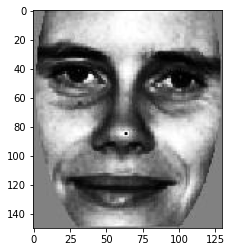

In [3]:
example_img_name = list(images.keys())[135]
plt.imshow(images[example_img_name], ) #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [4]:
# convert each to N^2 x 1 matrix
flattened = {}

for key in images:
    flattened[key] = images[key].flatten()
    
# get the mean 
mean = np.zeros(len(flattened[example_img_name]))
for key in flattened: 
    mean += flattened[key]

mean /= len(flattened.keys())
mean

array([129.04931071, 130.16675504, 129.71182397, ..., 129.21818664,
       129.21818664, 129.21818664])

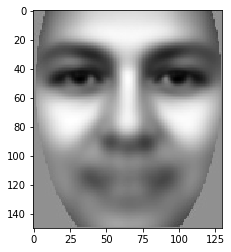

In [5]:
# just for fun, lets take a peek at the mean face :)

MEANFACE = mean.reshape(150, 130)
plt.imshow(MEANFACE, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

In [6]:
# create mean adjusted matrix, then get covariance matrices

mean_adjusted = {}

for key in flattened: 
    mean_adjusted[key] = flattened[key] - mean

data = list(mean_adjusted.values())
data = [c.reshape(-1,1) for c in data]
a = np.column_stack(tuple(data))

covar = a @ a.T
covar2 = a.T @ a

In [7]:
covar

array([[ 32546.82820785, -13226.0164369 ,  -2438.39925769, ...,
          2931.41728526,   2931.41728526,   2931.41728526],
       [-13226.0164369 ,  58700.11108165,  -8628.73727466, ...,
          3173.76060445,   3173.76060445,   3173.76060445],
       [ -2438.39925769,  -8628.73727466,  47349.75265111, ...,
          3362.16887593,   3362.16887593,   3362.16887593],
       ...,
       [  2931.41728526,   3173.76060445,   3362.16887593, ...,
          3099.43239661,   3099.43239661,   3099.43239661],
       [  2931.41728526,   3173.76060445,   3362.16887593, ...,
          3099.43239661,   3099.43239661,   3099.43239661],
       [  2931.41728526,   3173.76060445,   3362.16887593, ...,
          3099.43239661,   3099.43239661,   3099.43239661]])

In [8]:
covar2

array([[ 55482944.99406332,   1027192.67407393,   1836267.54416936, ...,
        -21529448.7402951 ,  15726919.24167732,  11687633.21887775],
       [  1027192.67407393,  61785435.35408458,  23464353.22417999, ...,
         -8575266.06028451,  16416291.92168793,  10847229.89888835],
       [  1836267.54416936,  23464353.22417999,  52447969.09427541, ...,
        -14355641.19018906,   4692627.79178336,   9130147.76898378],
       ...,
       [-21529448.7402951 ,  -8575266.06028451, -14355641.19018906, ...,
         79540844.5253465 , -27941947.49268113, -22797766.51548071],
       [ 15726919.24167732,  16416291.92168793,   4692627.79178336, ...,
        -27941947.49268113,  69302116.48929128,  45112306.46649177],
       [ 11687633.21887775,  10847229.89888835,   9130147.76898378, ...,
        -22797766.51548071,  45112306.46649177,  62793157.44369216]])

In [9]:
# get eigen values and eigen vectors for the A^TA matrix

covar2_eigvals, covar2_eigvecs = np.linalg.eig(covar2)
covar2_eigvals.shape

(3772,)

In [10]:
covar2_eigvals

array([3.01853707e+10, 2.56165913e+10, 1.24712773e+10, ...,
       1.05368153e+06, 1.02238467e+06, 1.02170525e+06])

In [11]:
covar2_eigvecs.shape

(3772, 3772)

In [12]:
a.shape

(19500, 3772)

In [13]:
# get eigen vectors for A*A^T matrix from A^T*A eigen vectors
covar_eigvecs = np.dot(a, covar2_eigvecs)
covar_eigvecs

array([[ 4.95026342e+00, -4.63382468e+00,  1.42982874e+01, ...,
         4.27234805e+00, -4.23421495e-01,  9.03149361e-02],
       [-3.05576193e+01,  3.19664026e+01, -2.11854627e+01, ...,
        -1.04628455e+01, -2.67868719e+00, -2.01741983e+00],
       [-1.80552349e+01,  1.51017757e+01,  3.20656237e+00, ...,
         3.03063296e+00, -4.06785292e+00, -1.31652547e+00],
       ...,
       [-5.34097379e-01,  3.66764433e-01,  4.61888401e+00, ...,
         1.73417296e-01, -1.02943594e-01, -1.67642513e-02],
       [-5.34097379e-01,  3.66764433e-01,  4.61888401e+00, ...,
         1.73417296e-01, -1.02943594e-01, -1.67642513e-02],
       [-5.34097379e-01,  3.66764433e-01,  4.61888401e+00, ...,
         1.73417296e-01, -1.02943594e-01, -1.67642513e-02]])

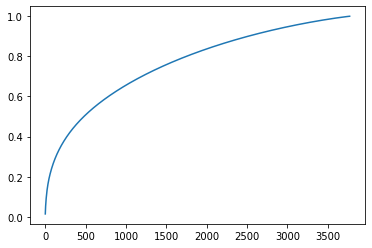

In [14]:
# use svd to get singular values matrix, to visualize an appropriate K value
# (which will represent the necessary eigen vectors to use)

U,S,V = np.linalg.svd(a,full_matrices=False)
sigmas=np.diag(S)
plt.plot(np.cumsum(S)/np.sum(S))

In [55]:
# from the plot above, we determined that a K value of 1250 is appropriate , as the 
# data seems to plateau after that

k = 1250

In [17]:
# normalize the eigenfaces (eigenvectors from A*A^T matrix)

normalized = covar_eigvecs.copy()

for i in range(0, normalized.shape[1]):
    normalized[:,i] = normalized[:,i]/np.linalg.norm(normalized[:,i])
    
normalized

array([[ 2.84924670e-05, -2.89520239e-05,  1.28034956e-04, ...,
         4.16209454e-03, -4.18760527e-04,  8.93504547e-05],
       [-1.75881945e-04,  1.99725306e-04, -1.89706620e-04, ...,
        -1.01928381e-02, -2.64920055e-03, -1.99587562e-03],
       [-1.03921376e-04,  9.43555275e-05,  2.87133738e-05, ...,
         2.95242353e-03, -4.02307453e-03, -1.30246618e-03],
       ...,
       [-3.07412973e-06,  2.29153526e-06,  4.13601008e-05, ...,
         1.68942037e-04, -1.01810404e-04, -1.65852243e-05],
       [-3.07412973e-06,  2.29153526e-06,  4.13601008e-05, ...,
         1.68942037e-04, -1.01810404e-04, -1.65852243e-05],
       [-3.07412973e-06,  2.29153526e-06,  4.13601008e-05, ...,
         1.68942037e-04, -1.01810404e-04, -1.65852243e-05]])

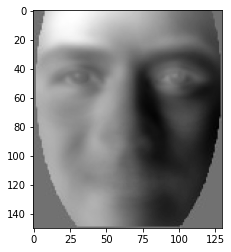

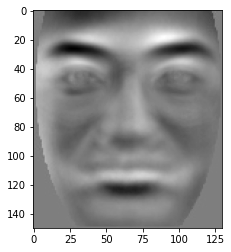

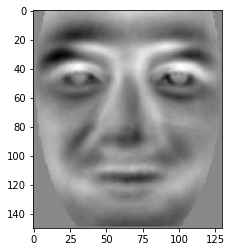

In [44]:
# lets take a peek at some of the eigenfaces 

eigenface = normalized[:,0].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')
output_dir = "results/eigenface_" + str(0)
plt.savefig(output_dir)

eigenface = normalized[:,12].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')
output_dir = "results/eigenface_" + str(12)
plt.savefig(output_dir)

# cursed
eigenface = normalized[:,23].reshape(150,130)
plt.figure()
plt.imshow(eigenface,cmap='gray')
output_dir = "results/eigenface_" + str(23)
plt.savefig(output_dir)


In [19]:
# get K eigenfaces

k_eigenfaces = normalized.copy()
k_eigenfaces = k_eigenfaces[:,0:k]
k_eigenfaces.shape

(19500, 1250)

FACE_COL:
 [[-0.04931071]
 [-4.16675504]
 [ 4.28817603]
 ...
 [ 0.78181336]
 [ 0.78181336]
 [ 0.78181336]] 


OMEGA SHAPE:
 (1250, 1) 


OMEGA:
 [[-8.61567583e+02]
 [ 2.86765189e+03]
 [-2.23756782e+02]
 ...
 [-1.02977639e+01]
 [ 3.80921642e+01]
 [-6.09723488e-01]] 


K EIGENFACES SHAPE:
 (19500, 1250) 




<Figure size 432x288 with 0 Axes>

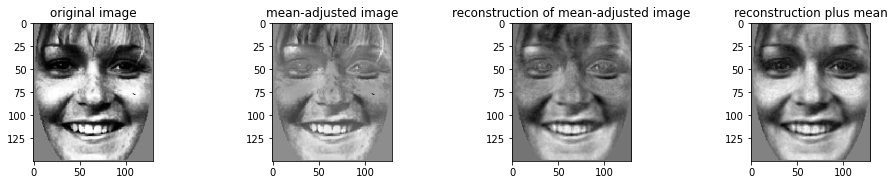

In [113]:
# grab a random face from the test faces

random_test_filename1, random_test_filename2 = np.random.choice(os.listdir('StarterFiles/Test1'), size=2, replace=False)
rand_face = img.imread('StarterFiles/Test1/' + random_test_filename1)
plt.figure()
rand_flat_face = rand_face.flatten()
mean_adj_rand_face = rand_flat_face - mean
face_col = mean_adj_rand_face.reshape(-1,1)
print("FACE_COL:\n", face_col, "\n\n")

omega = k_eigenfaces.T @ face_col
print("OMEGA SHAPE:\n", omega.shape, "\n\n")
print("OMEGA:\n", omega, "\n\n")
print("K EIGENFACES SHAPE:\n", k_eigenfaces.shape, "\n\n")

# confirming we can mostly reconstruct a random face using k eigvecs

fig = plt.figure(figsize=[15,15])
fig.subplots_adjust(hspace=1,wspace=1)
plt.subplot(1,4,1)
plt.title('original image')
plt.imshow(rand_face,cmap='gray')

expected_face = mean_adj_rand_face.reshape(150,130)
# plt.figure()
plt.subplot(1,4,2)
plt.title('mean-adjusted image')
plt.imshow(expected_face,cmap='gray')

reconstruction = (k_eigenfaces @ omega).reshape(150,130)
# plt.figure()
plt.subplot(1,4,3)
plt.title('reconstruction of mean-adjusted image')
plt.imshow(reconstruction,cmap='gray')

reconstruction_plus_mean = reconstruction + MEANFACE
# plt.figure()
plt.subplot(1,4,4)
plt.title('reconstruction plus mean')
plt.imshow(reconstruction_plus_mean,cmap='gray')

output_dir = "results/k_eigenvector_reconstruction_" + random_test_filename1
plt.savefig(output_dir) 

FACE_COL:
 [[-2.04931071]
 [ 5.83324496]
 [-2.71182397]
 ...
 [-0.21818664]
 [-0.21818664]
 [-0.21818664]] 


OMEGA SHAPE:
 (1250, 1) 


OMEGA:
 [[-5807.26543076]
 [ 4863.11653045]
 [ -479.85734725]
 ...
 [   36.72221817]
 [   12.10093471]
 [  -10.2383823 ]] 


K EIGENFACES SHAPE:
 (19500, 1250) 




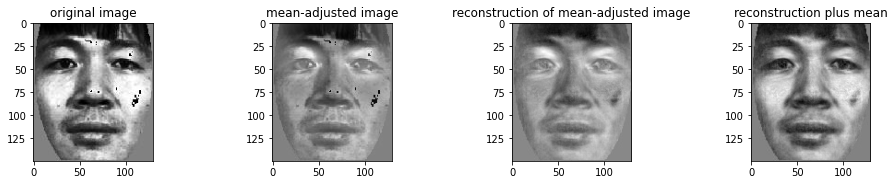

In [121]:
# the other random face
rand_face = img.imread('StarterFiles/Test1/' + random_test_filename2)
rand_flat_face = rand_face.flatten()
mean_adj_rand_face = rand_flat_face - mean
face_col = mean_adj_rand_face.reshape(-1,1)
print("FACE_COL:\n", face_col, "\n\n")

omega = k_eigenfaces.T @ face_col
print("OMEGA SHAPE:\n", omega.shape, "\n\n")
print("OMEGA:\n", omega, "\n\n")
print("K EIGENFACES SHAPE:\n", k_eigenfaces.shape, "\n\n")

# confirming we can mostly reconstruct a random face using k eigvecs


fig = plt.figure(figsize=[15,15])
fig.subplots_adjust(hspace=1,wspace=1)
plt.subplot(1,4,1)
plt.title('original image')
plt.imshow(rand_face,cmap='gray')

expected_face = mean_adj_rand_face.reshape(150,130)
# plt.figure()
plt.subplot(1,4,2)
plt.title('mean-adjusted image')
plt.imshow(expected_face,cmap='gray')

reconstruction = (k_eigenfaces @ omega).reshape(150,130)
# plt.figure()
plt.subplot(1,4,3)
plt.title('reconstruction of mean-adjusted image')
plt.imshow(reconstruction,cmap='gray')

reconstruction_plus_mean = reconstruction + MEANFACE
# plt.figure()
plt.subplot(1,4,4)
plt.title('reconstruction plus mean')
plt.imshow(reconstruction_plus_mean,cmap='gray')

output_dir = "results/k_eigenvector_reconstruction_" + random_test_filename2
plt.savefig(output_dir) 

In [115]:
a.shape

(19500, 3772)

In [116]:
# omega for each face in the training set

all_train_omegas = k_eigenfaces.T @ a
all_train_omegas.shape

(1250, 3772)

In [117]:
# finding the closest match in the training set (by comparing omegas)
# we chose to use the omega of the second random face above as our test image

omega = omega.flatten()
filename_keys = list(mean_adjusted.keys())
magnitudes = {}


for L in range(0, all_train_omegas.shape[1]):
    key = filename_keys[L]
    omega_L = (all_train_omegas[:, L]).flatten()
    diff_vec = omega - omega_L
    diff_magnitude = np.linalg.norm(diff_vec)
    magnitudes[key] = [L, diff_magnitude]


key_min = min(magnitudes.keys(), key=(lambda k: (magnitudes[k])[1]))
e_r = (magnitudes[key_min])[1]
min_L = (magnitudes[key_min])[0]

there is a match between the original image and face L = 95
original image filename: 00029fb010.941031.jpg
matched image filename: 00029fa010.941031.jpg


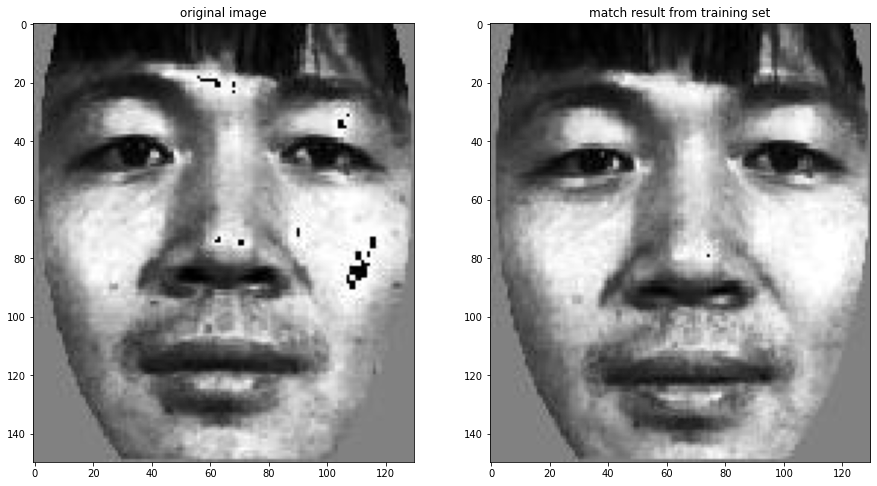

In [119]:
# now let's compare the original face with the match result!

print("there is a match between the original image and face L = " + str(min_L))
print("original image filename: " + str(random_test_filename2))
print("matched image filename: " + str(key_min))

fig = plt.figure(figsize=[15,15])
# fig.subplots_adjust(hspace=1,wspace=1)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(rand_face,cmap='gray')

plt.subplot(1,2,2)
plt.title('match result from training set')
plt.imshow(images[key_min],cmap='gray')
 
output_dir = "results/" + key + "_matched_" + key_min
plt.savefig(output_dir) 